## GSE33980 - oxidative stress response
### DPGP data visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### DPGP

In [2]:
optimal_clusters_control = pd.read_csv("DPGP/results/GSE33980/paper/geo_ura3_optimal_clustering.txt", sep="\t")
optimal_clusters_mutant = pd.read_csv("DPGP/results/GSE33980/paper/geo_d258_optimal_clustering.txt", sep="\t")

optimal_clusters_control_grouped = optimal_clusters_control.groupby("cluster")
optimal_clusters_mutant_grouped = optimal_clusters_mutant.groupby("cluster")

optimal_clusters_control_count = optimal_clusters_control_grouped.count()
optimal_clusters_mutant_count = optimal_clusters_mutant_grouped.count()

In [3]:
def plot_clusters(df_count_ctrl, df_count_mutant):
    fig, ax = plt.subplots(1, 3, figsize=(12, 5))
    df_count_ctrl.plot.bar(ax = ax[0], title="Control strain", ylabel="Number of genes", legend=None, color="seagreen")
    df_count_mutant.plot.bar(ax = ax[1], title="Mutant strain", ylabel="Number of genes", legend=None, color="peru")

    pd.concat(
        [
            df_count_ctrl.rename(columns={"gene": "control"}),
            df_count_mutant.rename(columns={"gene": "mutant"}),
        ], 
        axis=1,
    ).plot.box(ax=ax[2], widths=0.5, title="Number of genes per cluster")

    plt.tight_layout()
    plt.show()

    return pd.concat(
        [
            df_count_ctrl.describe().rename(columns={"gene": "control"}),
            df_count_mutant.describe().rename(columns={"gene": "mutant"}),
        ], 
        axis=1,
    )

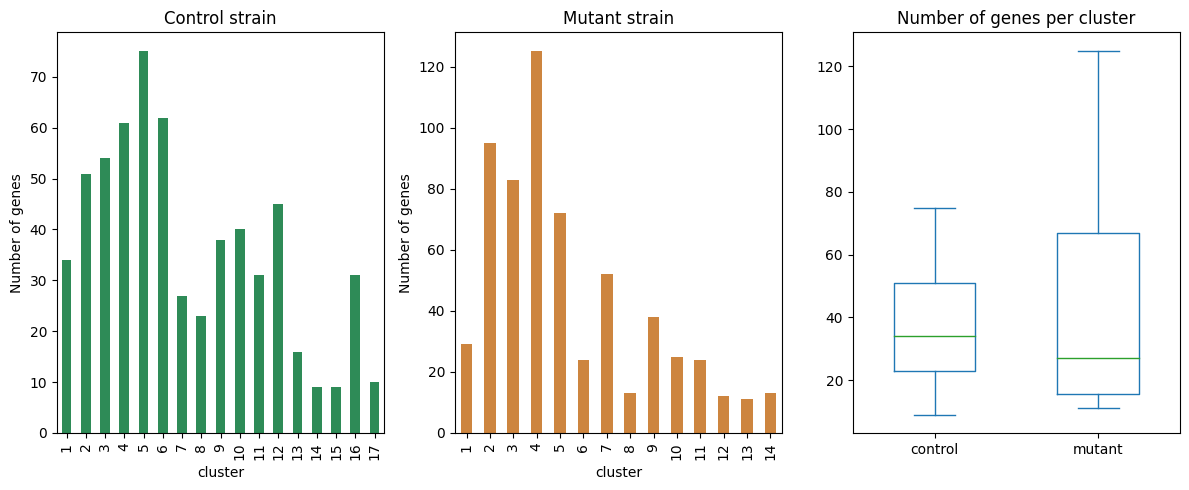

,control,mutant
count,17.000000,14.000000
mean,36.235294,44.000000
std,19.857396,36.149263
min,9.000000,11.000000
25%,23.000000,15.750000
50%,34.000000,27.000000
75%,51.000000,67.000000
max,75.000000,125.000000


In [4]:
plot_clusters(optimal_clusters_control_count, optimal_clusters_mutant_count)

In [5]:
from IPython.display import display_html

def cocluster(df_one_grouped, df_two_grouped):
    co_cluster_dict = dict()
    for one_name, one_group in df_one_grouped:
        co_cluster_dict[one_name] = dict()
        for two_name, two_group in df_two_grouped:
            co_cluster_dict[one_name][two_name] = one_group["gene"].isin(two_group["gene"]).sum()

    return pd.DataFrame(co_cluster_dict)

def show_clusters_matrices(df_cocluster, cr_label="Column vs. Row highlight", rc_label="Row vs. Column highLight"):
    col_vs_row = df_cocluster.style.background_gradient(
        axis=0, 
        cmap="cividis",
    ).set_table_attributes("style='display:inline'").set_caption(cr_label)

    row_vs_col = df_cocluster.style.background_gradient(
        axis=1, 
        cmap="cividis",
    ).set_table_attributes("style='display:inline'").set_caption(rc_label)
    
    space = "\xa0" * 10

    return display_html(
        col_vs_row._repr_html_() + space + row_vs_col._repr_html_(),
        raw=True
    )

In [6]:
gse33980_clusters_grouped = pd.read_csv("DPGP/data/GSE33980/GSE33980_DGE_h2o2_suppl_clusters.csv").rename(columns={"ORF": "gene"}).groupby("cluster")

dpgp_co_cluster = cocluster(optimal_clusters_mutant_grouped, optimal_clusters_control_grouped)
gse33980_vs_control = cocluster(optimal_clusters_control_grouped, gse33980_clusters_grouped)
gse33980_vs_mutant = cocluster(optimal_clusters_mutant_grouped, gse33980_clusters_grouped)

In [7]:
show_clusters_matrices(dpgp_co_cluster, cr_label="Mutant vs. Control highlight", rc_label="Control vs. Mutant highlight")

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,15,4,0,0,0,0,13,0,1,1,0,0,0,0
2,7,13,2,1,7,0,9,0,0,1,9,0,1,1
3,0,0,22,16,3,2,0,4,1,1,0,1,1,3
4,0,0,18,25,4,0,0,3,7,0,0,0,0,4
5,2,13,7,6,16,1,9,1,3,5,5,3,3,1
6,0,1,9,25,7,2,0,0,15,1,0,2,0,0
7,0,3,1,3,5,6,0,0,2,3,2,1,1,0
8,0,0,6,6,0,0,0,4,4,1,0,1,1,0
9,0,0,9,18,7,0,0,0,1,0,1,2,0,0
10,2,17,0,0,0,0,17,0,0,2,1,1,0,0


In [8]:
show_clusters_matrices(gse33980_vs_control)
gse33980_clusters_grouped.count()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
cluster1a,2,1,3,2,1,0,4,1,8,3,0,1,0,2,2,0,3
cluster1b,0,1,2,0,2,2,0,0,3,2,8,0,2,3,3,2,0
cluster2a,1,13,0,0,33,0,0,0,0,0,0,5,4,0,1,2,0
cluster2b_early,0,0,1,9,0,15,16,0,1,0,0,0,0,0,0,0,1
cluster2b_late,0,12,2,0,27,0,0,0,0,0,15,1,0,0,0,26,3
cluster3,0,0,7,7,1,3,0,1,4,0,2,0,0,1,1,0,0
cluster4a,30,24,0,0,11,0,0,0,0,33,0,38,10,2,0,1,3
cluster4b,0,0,36,42,0,42,7,19,22,0,2,0,0,1,2,0,0
cluster_dynamic,1,0,3,1,0,0,0,2,0,2,4,0,0,0,0,0,0
,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17


,gene,alias,genbank.gi,protein.length,arCOG.cat,arCOG.id,protein.fxn
cluster,,,,,,,
cluster1a,33,33,32,32,30,30,30
cluster1b,30,30,30,30,28,28,28
cluster2a,62,62,62,62,60,60,60
cluster2b_early,43,43,40,40,38,38,38
cluster2b_late,86,86,86,86,83,83,83
cluster3,27,27,22,22,21,21,21
cluster4a,157,156,155,155,155,155,155
cluster4b,175,175,168,168,168,158,168
cluster_dynamic,13,13,13,13,12,12,12


In [9]:
show_clusters_matrices(gse33980_vs_mutant)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cluster1a,2,2,4,2,5,3,2,0,2,4,5,1,1,0
cluster1b,0,2,2,7,4,3,1,1,0,1,0,6,2,1
cluster2a,3,10,0,4,11,2,6,1,2,4,7,2,5,2
cluster2b_early,0,3,5,8,3,9,0,1,7,4,1,1,1,0
cluster2b_late,1,0,10,18,31,4,1,0,5,5,9,1,0,1
cluster3,0,0,10,14,2,0,0,0,0,0,0,0,0,1
cluster4a,22,78,0,0,0,3,40,0,0,6,2,0,1,0
cluster4b,0,0,51,67,16,0,0,10,18,1,0,1,1,8
cluster_dynamic,1,0,1,5,0,0,2,0,4,0,0,0,0,0
,1,2,3,4,5,6,7,8,9,10,11,12,13,14


#### fDPGP

##### Equidistant timepoint

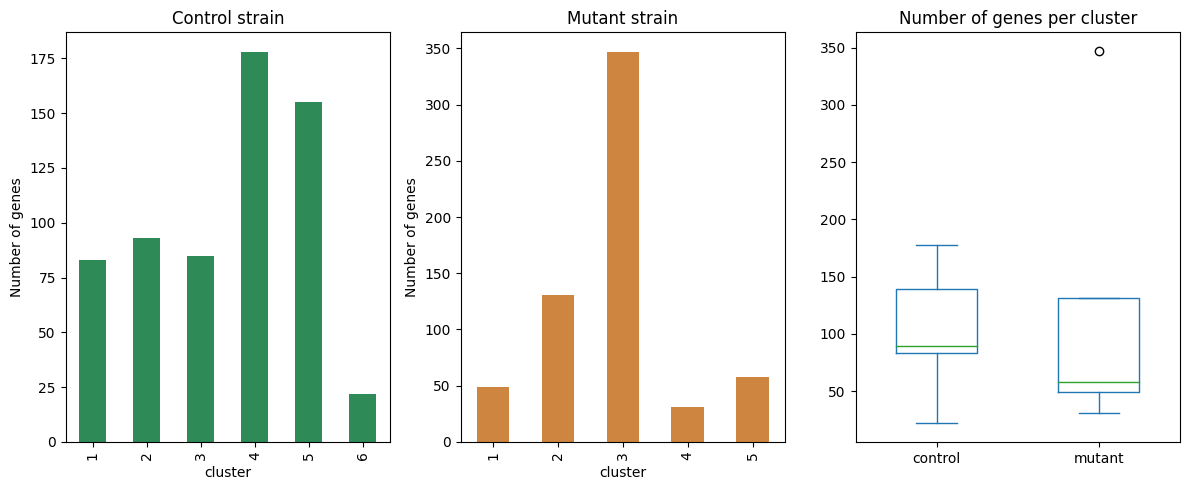

,control,mutant
count,6.000000,5.000000
mean,102.666667,123.200000
std,56.059492,130.771557
min,22.000000,31.000000
25%,83.500000,49.000000
50%,89.000000,58.000000
75%,139.500000,131.000000
max,178.000000,347.000000


In [10]:
optimal_clusters_fast_control = pd.read_csv("DPGP/results/GSE33980/paper_fast/geo_ura3_optimal_clustering.txt", sep="\t")
optimal_clusters_fast_mutant = pd.read_csv("DPGP/results/GSE33980/paper_fast/geo_d258_optimal_clustering.txt", sep="\t")

optimal_clusters_fast_control_grouped = optimal_clusters_fast_control.groupby("cluster")
optimal_clusters_fast_mutant_grouped = optimal_clusters_fast_mutant.groupby("cluster")

optimal_clusters_fast_control_count = optimal_clusters_fast_control_grouped.count()
optimal_clusters_fast_mutant_count = optimal_clusters_fast_mutant_grouped.count()

plot_clusters(optimal_clusters_fast_control_count, optimal_clusters_fast_mutant_count)

In [11]:
fdpgp_co_cluster = cocluster(optimal_clusters_fast_mutant_grouped, optimal_clusters_fast_control_grouped)
gse33980_vs_fcontrol = cocluster(optimal_clusters_fast_control_grouped, gse33980_clusters_grouped)
gse33980_vs_fmutant = cocluster(optimal_clusters_fast_mutant_grouped, gse33980_clusters_grouped)

In [12]:
show_clusters_matrices(fdpgp_co_cluster, cr_label="Mutant vs. Control highlight", rc_label="Control vs. Mutant highlight")

,1,2,3,4,5
1,25,33,9,0,16
2,8,58,14,4,9
3,2,3,70,8,2
4,1,8,147,10,12
5,13,28,90,6,18
6,0,1,17,3,1
,1,2,3,4,5
1,25,33,9,0,16
2,8,58,14,4,9
3,2,3,70,8,2


In [13]:
show_clusters_matrices(gse33980_vs_fcontrol)
show_clusters_matrices(gse33980_vs_fmutant)
gse33980_clusters_grouped.count()

,1,2,3,4,5,6
cluster1a,7,4,5,15,1,1
cluster1b,1,5,3,8,11,2
cluster2a,1,18,1,0,39,0
cluster2b_early,0,0,2,40,0,1
cluster2b_late,6,2,0,0,74,4
cluster3,1,1,6,13,2,4
cluster4a,65,62,0,0,25,0
cluster4b,0,0,64,101,1,7
cluster_dynamic,2,1,4,1,2,3
,1,2,3,4,5,6


,1,2,3,4,5
cluster1a,3,6,16,1,7
cluster1b,3,4,15,6,2
cluster2a,4,16,22,6,11
cluster2b_early,0,6,25,3,9
cluster2b_late,3,2,73,2,6
cluster3,0,0,27,0,0
cluster4a,35,94,1,0,22
cluster4b,0,2,158,13,0
cluster_dynamic,1,1,10,0,1
,1,2,3,4,5


,gene,alias,genbank.gi,protein.length,arCOG.cat,arCOG.id,protein.fxn
cluster,,,,,,,
cluster1a,33,33,32,32,30,30,30
cluster1b,30,30,30,30,28,28,28
cluster2a,62,62,62,62,60,60,60
cluster2b_early,43,43,40,40,38,38,38
cluster2b_late,86,86,86,86,83,83,83
cluster3,27,27,22,22,21,21,21
cluster4a,157,156,155,155,155,155,155
cluster4b,175,175,168,168,168,158,168
cluster_dynamic,13,13,13,13,12,12,12


##### True spacing between timepoints

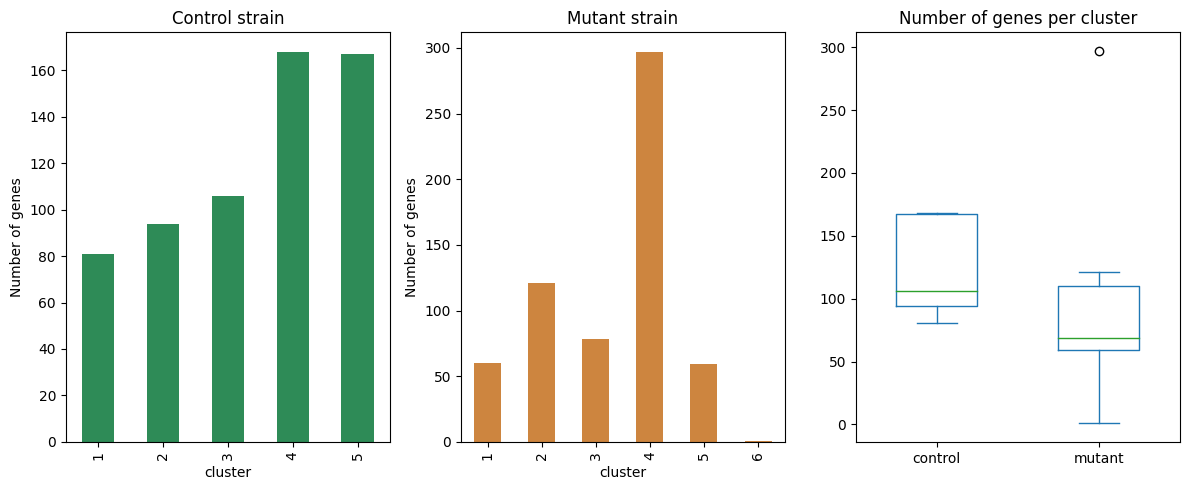

,control,mutant
count,5.00000,6.000000
mean,123.20000,102.666667
std,41.39686,102.735907
min,81.00000,1.000000
25%,94.00000,59.250000
50%,106.00000,69.000000
75%,167.00000,110.250000
max,168.00000,297.000000


In [14]:
optimal_clusters_fast_tt_control = pd.read_csv("DPGP/results/GSE33980/paper_fast_truetime/geo_ura3_optimal_clustering.txt", sep="\t")
optimal_clusters_fast_tt_mutant = pd.read_csv("DPGP/results/GSE33980/paper_fast_truetime/geo_d258_optimal_clustering.txt", sep="\t")

optimal_clusters_fast_tt_control_grouped = optimal_clusters_fast_tt_control.groupby("cluster")
optimal_clusters_fast_tt_mutant_grouped = optimal_clusters_fast_tt_mutant.groupby("cluster")

optimal_clusters_fast_tt_control_count = optimal_clusters_fast_tt_control_grouped.count()
optimal_clusters_fast_tt_mutant_count = optimal_clusters_fast_tt_mutant_grouped.count()

plot_clusters(optimal_clusters_fast_tt_control_count, optimal_clusters_fast_tt_mutant_count)

In [15]:
fdpgp_tt_co_cluster = cocluster(optimal_clusters_fast_tt_mutant_grouped, optimal_clusters_fast_tt_control_grouped)
gse33980_vs_f_tt_control = cocluster(optimal_clusters_fast_tt_control_grouped, gse33980_clusters_grouped)
gse33980_vs_f_tt_mutant = cocluster(optimal_clusters_fast_tt_mutant_grouped, gse33980_clusters_grouped)

In [16]:
show_clusters_matrices(fdpgp_tt_co_cluster, cr_label="Mutant vs. Control highlight", rc_label="Control vs. Mutant highlight")

,1,2,3,4,5,6
1,25,38,2,4,12,0
2,10,38,4,14,28,0
3,1,4,29,71,0,1
4,10,10,26,119,3,0
5,14,31,17,89,16,0
,1,2,3,4,5,6
1,25,38,2,4,12,0
2,10,38,4,14,28,0
3,1,4,29,71,0,1
4,10,10,26,119,3,0


In [17]:
show_clusters_matrices(gse33980_vs_f_tt_control)
show_clusters_matrices(gse33980_vs_f_tt_mutant)
gse33980_clusters_grouped.count()

,1,2,3,4,5
cluster1a,10,2,7,11,3
cluster1b,1,6,3,7,13
cluster2a,1,13,0,1,44
cluster2b_early,0,0,4,39,0
cluster2b_late,4,7,1,0,74
cluster3,1,1,12,10,3
cluster4a,62,64,0,1,25
cluster4b,0,0,74,97,2
cluster_dynamic,2,1,5,2,3
,1,2,3,4,5


,1,2,3,4,5,6
cluster1a,5,7,3,14,3,1
cluster1b,1,5,8,13,3,0
cluster2a,9,12,5,23,10,0
cluster2b_early,8,6,6,21,2,0
cluster2b_late,5,5,12,63,1,0
cluster3,0,0,6,21,0,0
cluster4a,30,82,0,0,40,0
cluster4b,1,2,38,132,0,0
cluster_dynamic,1,2,0,10,0,0
,1,2,3,4,5,6


,gene,alias,genbank.gi,protein.length,arCOG.cat,arCOG.id,protein.fxn
cluster,,,,,,,
cluster1a,33,33,32,32,30,30,30
cluster1b,30,30,30,30,28,28,28
cluster2a,62,62,62,62,60,60,60
cluster2b_early,43,43,40,40,38,38,38
cluster2b_late,86,86,86,86,83,83,83
cluster3,27,27,22,22,21,21,21
cluster4a,157,156,155,155,155,155,155
cluster4b,175,175,168,168,168,158,168
cluster_dynamic,13,13,13,13,12,12,12


In [18]:
ftt_vs_f_control = cocluster(optimal_clusters_fast_control_grouped, optimal_clusters_fast_tt_control_grouped)
ftt_vs_f_mutant = cocluster(optimal_clusters_fast_mutant_grouped, optimal_clusters_fast_tt_mutant_grouped)

In [19]:
show_clusters_matrices(ftt_vs_f_control, cr_label="Fast vs. true time fast highlight", rc_label="True time fast vs. fast highlight")

,1,2,3,4,5,6
1,69,6,1,4,1,0
2,12,72,1,0,8,1
3,0,1,71,20,0,14
4,2,0,12,154,0,0
5,0,14,0,0,146,7
,1,2,3,4,5,6
1,69,6,1,4,1,0
2,12,72,1,0,8,1
3,0,1,71,20,0,14
4,2,0,12,154,0,0


In [20]:
show_clusters_matrices(ftt_vs_f_mutant, cr_label="Fast vs. true time fast highlight", rc_label="True time fast vs. fast highlight")

,1,2,3,4,5
1,9,2,4,0,45
2,37,72,0,4,8
3,1,0,52,24,1
4,0,0,291,2,4
5,2,57,0,0,0
6,0,0,0,1,0
,1,2,3,4,5
1,9,2,4,0,45
2,37,72,0,4,8
3,1,0,52,24,1


##### Extra output

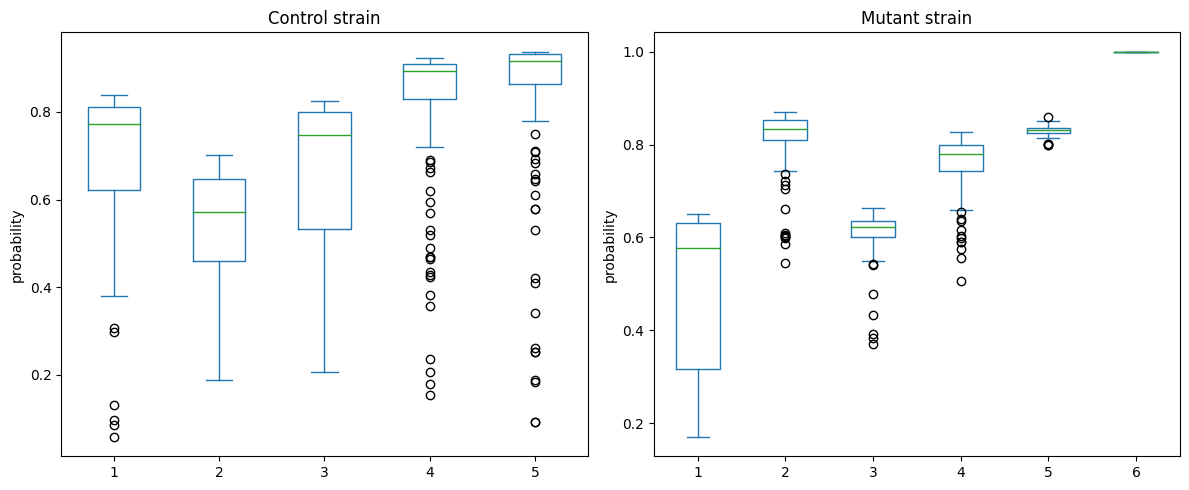

In [21]:
optimal_clusters_extra_control = pd.read_csv("DPGP/results/GSE33980/extra_output/geo_ura3_optimal_clustering.txt", sep="\t")
optimal_clusters_extra_mutant = pd.read_csv("DPGP/results/GSE33980/extra_output/geo_d258_optimal_clustering.txt", sep="\t")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
optimal_clusters_extra_control.plot.box(by="cluster", ax= ax[0], ylabel="probability")
optimal_clusters_extra_mutant.plot.box(by="cluster", ax= ax[1], ylabel="probability")

ax[0].set_title("Control strain")
ax[1].set_title("Mutant strain")
plt.tight_layout()
plt.show()

In [22]:
print(f"{'Control strain':15}", optimal_clusters_extra_control.groupby("cluster").count()["gene"].to_dict())
print(f"{'Mutant strain':15}", optimal_clusters_extra_mutant.groupby("cluster").count()["gene"].to_dict())

Control strain  {1: 81, 2: 94, 3: 106, 4: 168, 5: 167}
Mutant strain   {1: 60, 2: 121, 3: 78, 4: 297, 5: 59, 6: 1}


From the DPGP paper
> For each gene, DPGP can optionally estimate a probability of inclusion to its assigned cluster
based on the weighted mean frequency of co-occurrence with all other genes in that cluster
across Gibbs samples.